# Wine Quality - Spiralytics

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV

## Prepare Data for Model

1. Remove all rows with missing data
2. Add target column to represent "poor" (3,4), "normal"(5,6,7), "excellent"(8,9)
3. Split white wine and red wine into 2 different DataFrames

In [44]:
# Import CSV file
wine_quality = pd.read_csv("wine-quality.csv")
len(wine_quality)

6497

In [45]:
# 1 - Remove all rows with missing data
wine_quality.dropna(inplace=True)
wine_quality.isna().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [47]:
# 2 - Add target column to represent "poor" (3,4), "normal"(5,6,7), "excellent"(8,9)
def set_target(row):
    if row["quality"] >= 8:
        return 2
    elif row["quality"] < 5:
        return 0
    elif row["quality"] >=5 & row["quality"] < 8:
        return 1
    
    
wine_quality = wine_quality.assign(target=wine_quality.apply(set_target, axis=1))
wine_quality["target"].value_counts()

1    6022
0     244
2     197
Name: target, dtype: int64

In [48]:
# Testing target column has correct values 
wine_quality[(wine_quality["quality"] == 8) & (wine_quality["target"] == 1)]

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,target


In [49]:
wine_quality[(wine_quality["quality"] == 9) & (wine_quality["target"] == 0)]

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,target


In [50]:
wine_quality[(wine_quality["quality"] == 3) & (wine_quality["target"] == 2)]

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,target


In [51]:
wine_quality[(wine_quality["quality"] == 5) & (wine_quality["target"] == 0)]

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,target


In [52]:
# Dropping quality column
wine_quality.drop("quality", axis=1, inplace=True)

In [53]:
# 3 - Split white wine and red wine into 2 different DataFrames
white_wine = wine_quality[wine_quality["type"] == "white"]
red_wine = wine_quality[wine_quality["type"] == 'red']
white_wine.drop("type", axis=1, inplace=True)
red_wine.drop("type", axis=1, inplace=True)

/Users/branlewalk/courses/C964/env/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [65]:
red_wine.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,target
4898,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,1
4899,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,1
4900,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,1
4901,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
4902,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,1
4903,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,1
4904,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,1
4905,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,1
4906,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,1
4907,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,1


In [67]:
red_wine["target"].value_counts()

1    1513
0      62
2      18
Name: target, dtype: int64

In [66]:
white_wine.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,target
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,1
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,1
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,1
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,1
5,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,1
6,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,1
7,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,1
8,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,1
9,8.1,0.22,0.43,1.5,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,1


In [68]:
white_wine["target"].value_counts()

1    4509
0     182
2     179
Name: target, dtype: int64

### Datasets 

In [55]:
# Create X and y for K-Means Clustering and Classification Model

# Red Wine Datasets
red_x = red_wine.drop("target", axis=1)
red_y = pd.DataFrame(red_wine["target"])


# White Wine Datasets
white_x = white_wine.drop("target", axis=1)
white_y = pd.DataFrame(white_wine["target"])
white_y.value_counts()

target
1         4509
0          182
2          179
dtype: int64

## K-Means Clustering

1. Feature slection for both White and Red Datasets
2. Create plot method
3. Plot 2 graphs for each Wine based on top three features (1,2), (1,3)

### Feature Selection

Top Three Features for Red Wine:

    * Volatile Acidity
    * Alcohol
    * Sulphates
    
Top Three Features for White Wine:

    * Free Sulfur Dioxide
    * Volatile Acidity
    * Alcohol

[0.08363793 0.13230445 0.08645806 0.09181383 0.08423647 0.08251806
 0.08278839 0.0802681  0.090153   0.0936356  0.09218611]


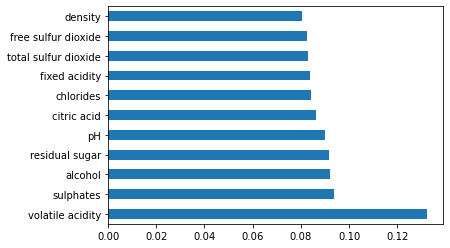

In [56]:
# Best Feature Selection for Red Wines
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

x = red_x.iloc[:,0:11]
y = red_y.iloc[:,-1]
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(x,y)
print(model.feature_importances_)

feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(11).plot(kind='barh')
plt.show();

[0.08394346 0.10436457 0.08370042 0.08567795 0.08354586 0.11612114
 0.09126211 0.08543115 0.0842683  0.08779214 0.09389289]


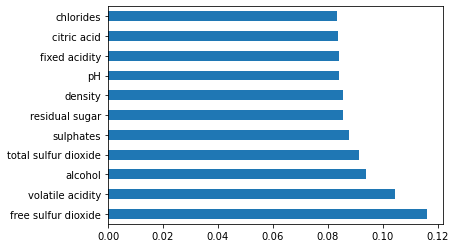

In [57]:
# Best Feature Selection for White Wines
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

x = white_x.iloc[:,0:11]
y = white_y.iloc[:,-1]
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(x,y)
print(model.feature_importances_)

feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(11).plot(kind='barh')
plt.show()

In [58]:
# 2 - Create plot method
from sklearn.cluster import MiniBatchKMeans
from sklearn.cluster import SpectralClustering
from sklearn import preprocessing
    
def plot_Kmeans_vs_labled(wine, X, var1, var2):

    # Scale features
    X = preprocessing.scale(X)

    
    # Applying k-means to the dataset
    kmeans=MiniBatchKMeans(n_clusters=3, random_state=0)
    y_kmeans=kmeans.fit_predict(X)

    # 2 subplots
    fig, ax1 = plt.subplots(nrows=1,
                            ncols=1,
                            figsize=(10,10));
    
    if wine == "Red":
        wine_x = red_x
        wine_y = red_y
    elif wine == "White":
        wine_x = white_x
        wine_y = white_y
    
    # before k_means
#    scatter = ax0.scatter(x=wine_x[var1],
#                         y=wine_x[var2],
#                         c=wine_y['target']);
#    ax0.legend(*scatter.legend_elements(), title="Target")
#    ax0.set(title="Class Labels of {} and {}".format(var1,var2),
#          xlabel=var1,
#          ylabel=var2);

    # With K-Means

    scatter= ax1.scatter(x=X[:,0],
                         y=X[:,1],
                         c=kmeans.labels_)

    ax1.set(title="K-Means Clustering of {} and {} for {} Wine".format(var1,var2,wine),
          xlabel=var1,
          ylabel=var2);
    ax1.legend(*scatter.legend_elements(), title="Target")
    
    # Save figure
    fig.savefig("static/images/{}-wine-{}-{}.png".format(wine, var1, var2))

### 3. Plot Graphs

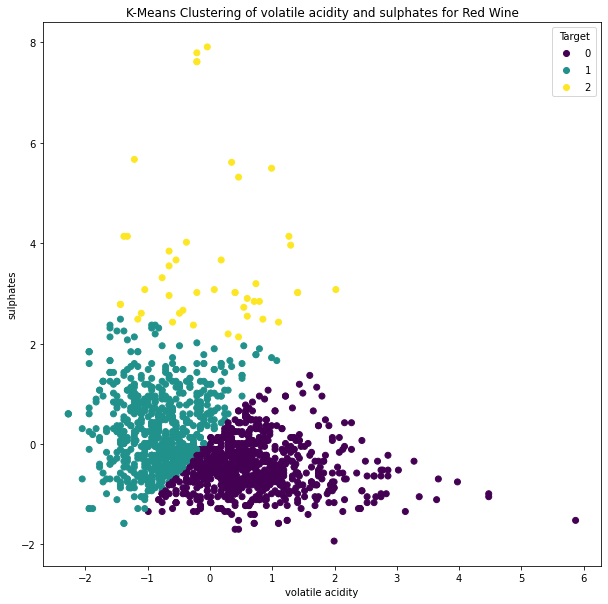

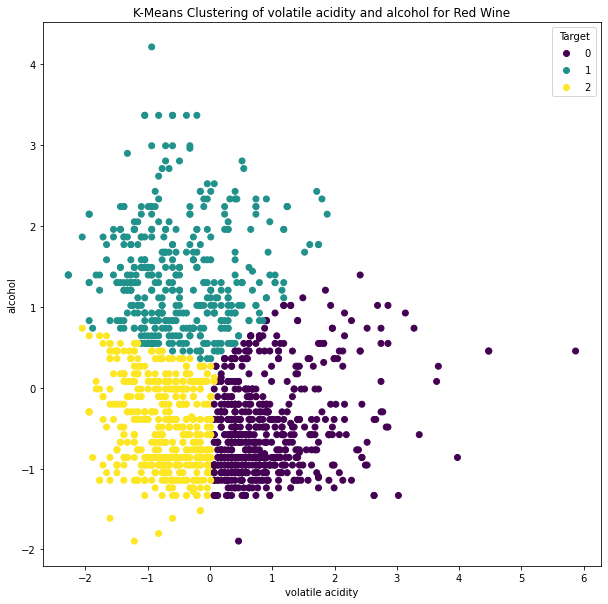

In [59]:
# Red Wine Graphs
red_sulphates_volatile_acidity = red_x.iloc[: , [1,9]].values
red_alcohol_volatile_acidity = red_x.iloc[: , [1,10]].values

plot_Kmeans_vs_labled("Red", red_sulphates_volatile_acidity, "volatile acidity", "sulphates")
plot_Kmeans_vs_labled("Red", red_alcohol_volatile_acidity, "volatile acidity", "alcohol")

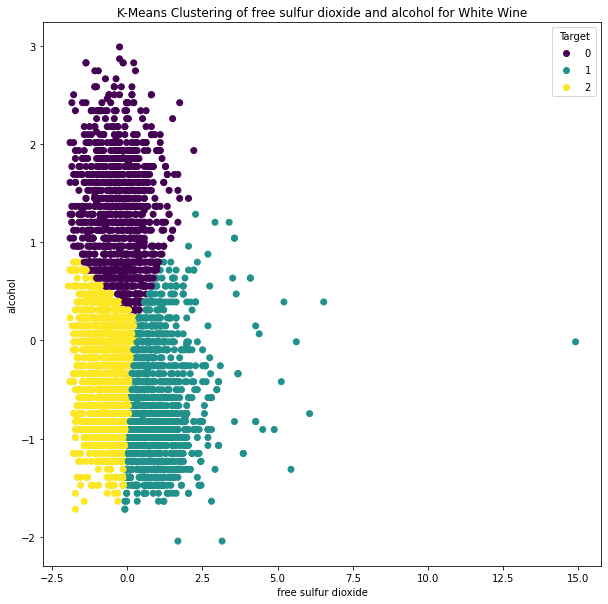

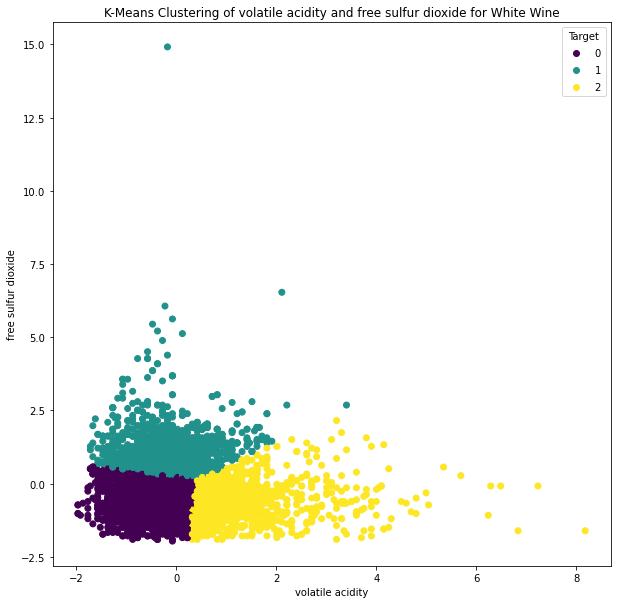

In [60]:
# White Wine Graphs
white_alcohol_free_sulfur_dioxide = white_x.iloc[: , [5,10]].values
white_volatile_acidity_free_sulfur_dioxide = white_x.iloc[: , [1,5]].values
plot_Kmeans_vs_labled("White", white_alcohol_free_sulfur_dioxide, "free sulfur dioxide", "alcohol")
plot_Kmeans_vs_labled("White", white_volatile_acidity_free_sulfur_dioxide, "volatile acidity", "free sulfur dioxide")

## Classification - Predictive Model

* Uses ensemble method (decision trees) - `RandomForestClassifier()`
* Evaluate with `GridSearcCV()` - conclusion will be to stay with baseline model

In [61]:
# Red Wines
# Import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

np.random.seed(25)

# Split Data into train and test sets
rx_train, rx_test, ry_train, ry_test = train_test_split(red_x, red_y, test_size=0.2)

# Instantiate the model
#red_model = RandomForestClassifier(max_depth=10, 
#                                   max_features='auto',
#                                   min_samples_leaf=2,
#                                   min_samples_split=4,
#                                   n_estimators=10)
red_model = RandomForestClassifier()
red_model.fit(rx_train, ry_train)

# Check the score
red_model.score(rx_test, ry_test)

<ipython-input-61-b4f93196a9fa>:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  red_model.fit(rx_train, ry_train)


0.9592476489028213

In [62]:
# White Wines
# Import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

np.random.seed(25)

# Split Data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(white_x, white_y, test_size=0.2)

# Instantiate the model
white_model = RandomForestClassifier(max_depth=10, 
                                    max_features='auto',
                                    min_samples_leaf=2,
                                    min_samples_split=4,
                                    n_estimators=10)
white_model.fit(x_train, y_train)

# Check the score
white_model.score(x_test, y_test)

<ipython-input-62-d60839d84c41>:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  white_model.fit(x_train, y_train)


0.9137577002053389

In [64]:
# Shuffle Data
red_wine_shuffled = red_wine.sample(frac=1)
white_wine_shuffled = white_wine.sample(frac=1)

# Red Wine Datasets
red_x = red_wine_shuffled.drop("target", axis=1)
red_y = red_wine_shuffled["target"]

# White Wine Datasets
white_x = white_wine_shuffled.drop("target", axis=1)
white_y = white_wine_shuffled["target"]

In [ ]:
from sklearn.model_selection import GridSearchCV

np.random.seed(25)

grid = {"n_estimators": [10,100,200,500,1000],
       "max_depth": [None, 10],
       "max_features": ["auto", "sqrt"],
       "min_samples_split": [2,4,6,8],
       "min_samples_leaf": [1,2,4,16]}


# Split into test and train sets
x_train, x_test, y_train, y_test = train_test_split(red_x, red_y,test_size=0.2)

# Instaniate RandomForestClassifier
clf = RandomForestClassifier(n_jobs=1)

# Setup RandomizedSearchCV
gs_clf = GridSearchCV(estimator=clf,
                      param_grid=grid,
                      cv=5,
                      verbose=2)

# Fir the GridSearchCV version of CLF
gs_clf.fit(x_train, y_train);

In [ ]:
gs_clf.best_params_

In [ ]:
# Best Parameters from GridSearcCV
"""
{'{'max_depth': 10,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 4,
 'n_estimators': 10}}
"""

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def evaluate_score(y_true, y_preds):
    """
    Performs evaluation comparison on y_true labels vs y_pred labels on a classification
    """
    accuracy = accuracy_score(y_true, y_preds)
    precision = precision_score(y_true, y_preds, average='macro')
    recall = recall_score(y_true, y_preds, average='macro')
    f1 = f1_score(y_true, y_preds, average='macro')
    metric_dict = {"accuracy": accuracy,
                  "precision": precision,
                  "recall": recall,
                  "f1": f1}
    print("Accuracy: {0:.02f}%".format(accuracy*100))
    print("Precision: {0:.02f}".format(precision))
    print("Recall: {0:.02f}".format(recall))
    print("F1 score: {0:.02f}".format(f1))
    
    return metric_dict

In [ ]:
# Scoring for Red_Wine
# Predictions with baseline paratmeters
print("Baseline")
bl_y_preds = red_model.predict(rx_test)

# Evaluate the Basline predictions
bl_metrics = evaluate_score(ry_test, bl_y_preds)

# Make predictions with best parameters
print("GridSearchCV")
gs_y_preds = gs_clf.predict(x_test)

# Exavluate the prediction
gs_metrics = evaluate_score(y_test, gs_y_preds)

In [ ]:
# Comparing the different models based on the different hyperparameters
compare_metrics = pd.DataFrame({"Baseline": baseline_metrics,
                                "Grid Search": gs_metrics})

compare_metrics.plot.bar(figsize=(10, 8))

## Save Model for Flask Server
* use joblib to export file for web application

In [450]:
from joblib import dump, load

# save models to file
dump(red_model, filename="red_wine_model.joblib")
dump(white_model, filename="white_wine_model.joblib")

['white_wine_model.joblib']